In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv('4_DA Test- Whats app Campaign Process.csv')

In [3]:
df.head()

,Status,Priority,Company,Name,Tittle,Website,Company Linkedin,LinkedinURL,Duplicate,NumberDuplicate,...,WhatsappSequence2,Time.1,WhatsappSequence3,Time.2,WhatsappSequence4,Time.3,WhatsappSequence5,Time.4,Unnamed: 24,Unnamed: 25
0,Active,NaN,Accio Robotics,Tuhin Sharma,CoFounder,https://www.acciorobotics.com/,https://www.linkedin.com/company/acciorobotics,https://www.linkedin.com/in/tuhinsharma5,Unique,Unique,...,3-Feb-2025,3:48 PM,4-Feb-2025,1:44 PM,NaN,NaN,NaN,NaN,Accio Robotics,Tuhin Sharma
1,Inactive,NaN,Alt Mobility,Anuj Gupta,CoFounder&CBO,https://www.altmobility.com/,https://www.linkedin.com/company/altmobility,https://www.linkedin.com/in/anujgupta2408,Unique,Unique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alt Mobility,Anuj Gupta
2,Inactive,NaN,Alt Mobility,Dev Arora,Cofounder&CEO,https://www.altmobility.com/,https://www.linkedin.com/company/altmobility,https://www.linkedin.com/in/devarora,Unique,Unique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alt Mobility,Dev Arora
3,Inactive,NaN,Ambak,Pranav Khattar,CoFounder,https://www.ambak.com/,https://www.linkedin.com/company/ambakofficial,https://www.linkedin.com/in/pranavkhattarin,Unique,Unique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ambak,Pranav Khattar
4,Inactive,NaN,Ambak,Raghuveer Malik,CoFounder,https://www.ambak.com/,https://www.linkedin.com/company/ambakofficial,https://www.linkedin.com/in/raghuveermalikbb2a...,Unique,Unique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ambak,Raghuveer Malik


In [3]:
df.Sundaycampaign.unique()

array([nan, 'Sundaycampaign26jan2024'], dtype=object)

In [69]:
unique_count = (df['MessageFrom'] == 'Sa(personal)').sum()
unique_count

1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6492 entries, 0 to 6491
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Status             6492 non-null   object
 1   Priority           234 non-null    object
 2   Company            6492 non-null   object
 3   Name               6492 non-null   object
 4   Tittle             6441 non-null   object
 5   Website            3493 non-null   object
 6   Company Linkedin   3462 non-null   object
 7   LinkedinURL        5779 non-null   object
 8   Duplicate          6492 non-null   object
 9   NumberDuplicate    6492 non-null   object
 10  MessageFrom        3793 non-null   object
 11  WhatsappStatus     3834 non-null   object
 12  Notes              97 non-null     object
 13  Sundaycampaign     1418 non-null   object
 14  WhatsappSequence1  3335 non-null   object
 15  Time               2667 non-null   object
 16  WhatsappSequence2  2182 non-null   object


In [5]:
df.describe()

,Status,Priority,Company,Name,Tittle,Website,Company Linkedin,LinkedinURL,Duplicate,NumberDuplicate,...,WhatsappSequence2,Time.1,WhatsappSequence3,Time.2,WhatsappSequence4,Time.3,WhatsappSequence5,Time.4,Unnamed: 24,Unnamed: 25
count,6492,234,6492,6492,6441,3493,3462,5779,6492,6492,...,2182,2139,1138,1138,374,374,190,190,6492,6492
unique,2,10,2739,4451,1265,2208,2023,4629,2,1,...,26,27,13,14,5,5,3,3,2739,4451
top,Active,2025Funded,Arcatron Mobility,Dewaj Baruah,CoFounder,http://www.lendingkart.com,https://www.linkedin.com/company/lendingkart,http://www.linkedin.com/in/vramanujam,Unique,Unique,...,12-Feb-2025,1:06 PM,4-Feb-2025,1.23PM,5-Dec-2024,4.24PM,10-Dec-2024,5.54pm,Arcatron Mobility,Dewaj Baruah
freq,5525,162,47,47,1353,10,10,6,4680,6492,...,198,198,142,99,95,95,94,94,47,47


In [6]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

### Data Cleaning

In [8]:
# Drop unnecessary columns (Unnamed columns seem redundant)
df_cleaned = df.drop(columns=["Unnamed: 24", "Unnamed: 25"])

# Check for duplicate rows and remove them if any
df_cleaned = df_cleaned.drop_duplicates()

# Handle missing values: Fill or drop based on context
# 'Priority' might be important, but it has too many missing values, so dropping it
df_cleaned = df_cleaned.drop(columns=["Priority", "Notes"])

# Convert time-related columns to proper datetime format where applicable
time_columns = ["Time", "Time.1", "Time.2", "Time.3", "Time.4"]
for col in time_columns:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors="coerce")

# Display updated dataset info after cleaning
df_cleaned.info(), df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
Index: 6409 entries, 0 to 6491
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Status             6409 non-null   object        
 1   Company            6409 non-null   object        
 2   Name               6409 non-null   object        
 3   Tittle             6360 non-null   object        
 4   Website            3492 non-null   object        
 5   Company Linkedin   3461 non-null   object        
 6   LinkedinURL        5696 non-null   object        
 7   Duplicate          6409 non-null   object        
 8   NumberDuplicate    6409 non-null   object        
 9   MessageFrom        3793 non-null   object        
 10  WhatsappStatus     3834 non-null   object        
 11  Sundaycampaign     1418 non-null   object        
 12  WhatsappSequence1  3335 non-null   object        
 13  Time               1151 non-null   datetime64[ns]
 14  WhatsappSeque

(None,
      Status         Company             Name         Tittle  \
 0    Active  Accio Robotics     Tuhin Sharma      CoFounder   
 1  Inactive    Alt Mobility       Anuj Gupta  CoFounder&CBO   
 2  Inactive    Alt Mobility        Dev Arora  Cofounder&CEO   
 3  Inactive           Ambak   Pranav Khattar      CoFounder   
 4  Inactive           Ambak  Raghuveer Malik      CoFounder   
 
                           Website  \
 0  https://www.acciorobotics.com/   
 1    https://www.altmobility.com/   
 2    https://www.altmobility.com/   
 3          https://www.ambak.com/   
 4          https://www.ambak.com/   
 
                                  Company Linkedin  \
 0  https://www.linkedin.com/company/acciorobotics   
 1    https://www.linkedin.com/company/altmobility   
 2    https://www.linkedin.com/company/altmobility   
 3  https://www.linkedin.com/company/ambakofficial   
 4  https://www.linkedin.com/company/ambakofficial   
 
                                          LinkedinU

### Data Handling

In [10]:
# Fill missing text and categorical values with 'Unknown' or 'Not Available'
text_columns = ["Website", "Company Linkedin", "LinkedinURL", "WhatsappStatus", "MessageFrom"]
df_cleaned[text_columns] = df_cleaned[text_columns].fillna("Unknown")

# Fill missing categorical values with 'Not Available'
categorical_columns = ["Sundaycampaign", "Duplicate", "NumberDuplicate"]
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].fillna("Not Available")

# Time columns: Keeping NaT as it represents missing timestamps accurately
# Display the dataset info after handling missing values
df_cleaned.info(), df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
Index: 6409 entries, 0 to 6491
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Status             6409 non-null   object        
 1   Company            6409 non-null   object        
 2   Name               6409 non-null   object        
 3   Tittle             6360 non-null   object        
 4   Website            6409 non-null   object        
 5   Company Linkedin   6409 non-null   object        
 6   LinkedinURL        6409 non-null   object        
 7   Duplicate          6409 non-null   object        
 8   NumberDuplicate    6409 non-null   object        
 9   MessageFrom        6409 non-null   object        
 10  WhatsappStatus     6409 non-null   object        
 11  Sundaycampaign     6409 non-null   object        
 12  WhatsappSequence1  3335 non-null   object        
 13  Time               1151 non-null   datetime64[ns]
 14  WhatsappSeque

(None,
      Status         Company             Name         Tittle  \
 0    Active  Accio Robotics     Tuhin Sharma      CoFounder   
 1  Inactive    Alt Mobility       Anuj Gupta  CoFounder&CBO   
 2  Inactive    Alt Mobility        Dev Arora  Cofounder&CEO   
 3  Inactive           Ambak   Pranav Khattar      CoFounder   
 4  Inactive           Ambak  Raghuveer Malik      CoFounder   
 
                           Website  \
 0  https://www.acciorobotics.com/   
 1    https://www.altmobility.com/   
 2    https://www.altmobility.com/   
 3          https://www.ambak.com/   
 4          https://www.ambak.com/   
 
                                  Company Linkedin  \
 0  https://www.linkedin.com/company/acciorobotics   
 1    https://www.linkedin.com/company/altmobility   
 2    https://www.linkedin.com/company/altmobility   
 3  https://www.linkedin.com/company/ambakofficial   
 4  https://www.linkedin.com/company/ambakofficial   
 
                                          LinkedinU

### Data Visualization

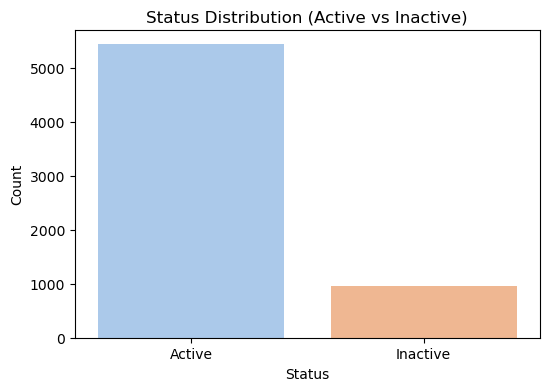

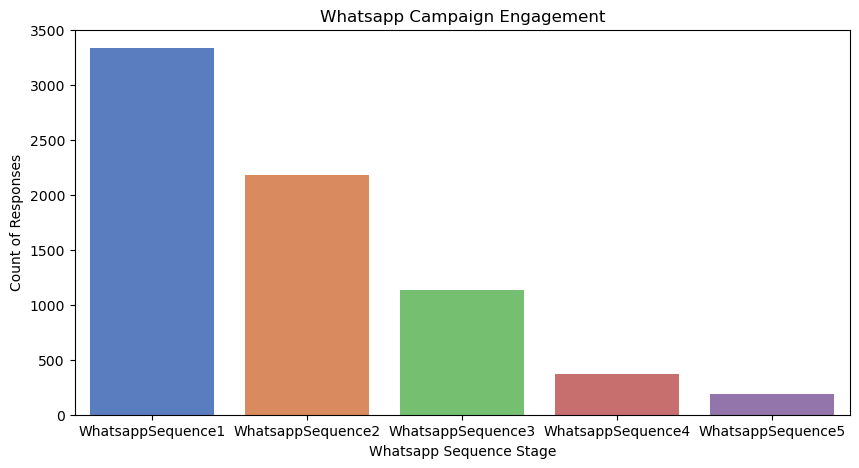

In [12]:
# Plot 1: Status Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x="Status", palette="pastel")
plt.title("Status Distribution (Active vs Inactive)")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

# Plot 2: Whatsapp Campaign Engagement (count of sequences)
whatsapp_cols = ["WhatsappSequence1", "WhatsappSequence2", "WhatsappSequence3", "WhatsappSequence4", "WhatsappSequence5"]
campaign_counts = df_cleaned[whatsapp_cols].notna().sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=campaign_counts.index, y=campaign_counts.values, palette="muted")
plt.title("Whatsapp Campaign Engagement")
plt.xlabel("Whatsapp Sequence Stage")
plt.ylabel("Count of Responses")
plt.show()




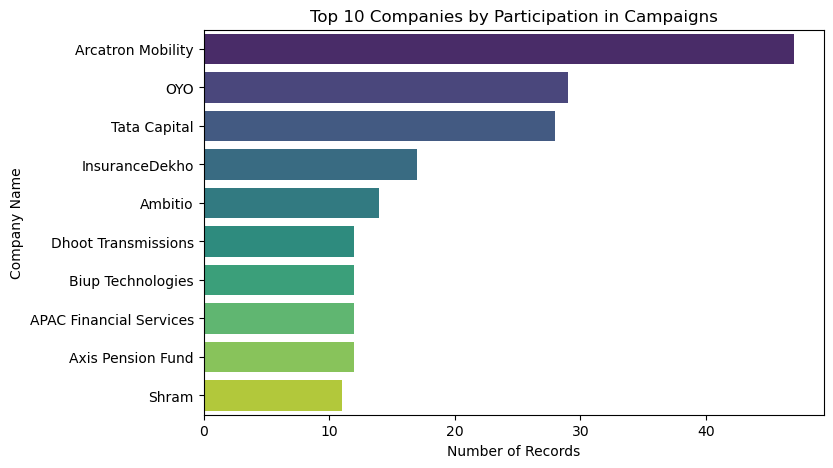

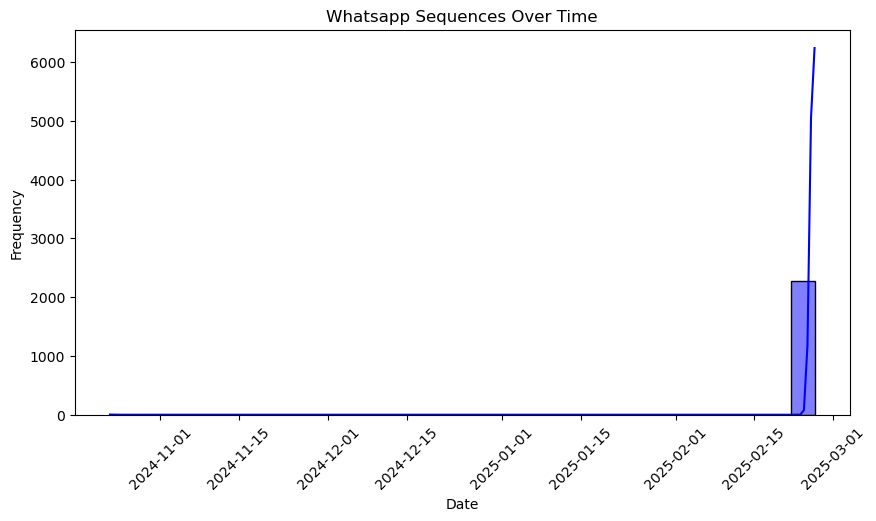

In [13]:
# Plot 3: Top 10 Companies by Participation
top_companies = df_cleaned["Company"].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(y=top_companies.index, x=top_companies.values, palette="viridis")
plt.title("Top 10 Companies by Participation in Campaigns")
plt.xlabel("Number of Records")
plt.ylabel("Company Name")
plt.show()

# Plot 4: Time-Based Trends for Whatsapp Sequences
df_time = df_cleaned[["Time", "Time.1", "Time.2"]].stack().reset_index(drop=True)
df_time = df_time.dropna().sort_values()

plt.figure(figsize=(10, 5))
sns.histplot(df_time, bins=30, kde=True, color="blue")
plt.title("Whatsapp Sequences Over Time")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()